In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [7]:
headers = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"}
player_list=[]
for i in range(1, 21):
    url = f'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?&ajax=yw1&page={i}'
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text,'html.parser')
    players = soup.find_all('tr', class_=['odd','even'])
    for player in players:
        info = player.find_all('td')
        number = info[0].text
        name = info[3].text
        position = info[4].text
        age = info[5].text
        nations = info[6].find_all('img')
        nation_text = ""
        count = 0
        for nation in nations:
            sep = "," if count > 0 else ""
            nation_text += sep
            nation_text +=  nation.get('alt')
            count += 1
        nation = nation_text
        team = info[7].img['alt']
        value = info[8].text.strip()
        player_list.append([number, name, position, age, nation, team, value])
    time.sleep(1)

In [8]:
df = pd.DataFrame(player_list, columns=['number', 'name', 'position', 'age', 'nation', 'team', 'value'])
df.set_index('number', inplace=True)
df

,name,position,age,nation,team,value
number,,,,,,
1,Jude Bellingham,Attacking Midfield,20,"England,Ireland",Real Madrid,€180.00m
2,Erling Haaland,Centre-Forward,23,Norway,Manchester City,€180.00m
3,Kylian Mbappé,Centre-Forward,25,"France,Cameroon",Paris Saint-Germain,€180.00m
4,Vinicius Junior,Left Winger,23,"Brazil,Spain",Real Madrid,€150.00m
5,Bukayo Saka,Right Winger,22,"England,Nigeria",Arsenal FC,€130.00m
...,...,...,...,...,...,...
496,Wout Faes,Centre-Back,25,Belgium,Leicester City,€20.00m
497,Ferland Mendy,Left-Back,28,"France,Senegal",Real Madrid,€20.00m
498,Mykola Matvienko,Centre-Back,27,Ukraine,Shakhtar Donetsk,€20.00m


In [20]:
df[df['nation'] == 'Korea,']['age'].count()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      500 non-null    object
 1   position  500 non-null    object
 2   age       500 non-null    object
 3   nation    500 non-null    object
 4   team      500 non-null    object
 5   value     500 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [18]:
df[df['nation'] == 'England']['age'].count()

35

In [2]:
headers2 = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"}
player_list2=[]
category = '전체'
url = f'https://myfranchise.kr/ranking/many?category={category}'
r = requests.get(url, headers=headers2)
soup = BeautifulSoup(r.text,'html.parser')
frenchize_rank = soup.find_all('ul', class_="css-190jpg7")
frenchize_rank

[]

<bound method Tag.prettify of <!DOCTYPE html>
<html dir="ltr" lang="ko"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/><script>if(/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
          window.location = 'microsoft-edge:' + window.location;
          setTimeout(function() {
            window.location = 'https://support.microsoft.com/office/160fa918-d581-4932-9e4e-1075c4713595';
          }, 1);
        }</script><script>
              (function(d,a,b,l,e,_) {
              d[b]=d[b]||function(){(d[b].q=d[b].q||[]).push(arguments)};e=a.createElement(l);
              e.async=1;e.charset='utf-8';e.src='//static.dable.io/dist/dablena.min.js';
              _=a.getElementsByTagName(l)[0];_.parentNode.insertBefore(e,_);
              })(window,document,'dablena','script');
              dablena('init', '001-007-237');
            </script><script async="" data-site-id="gvoigfppno" src="https://bu
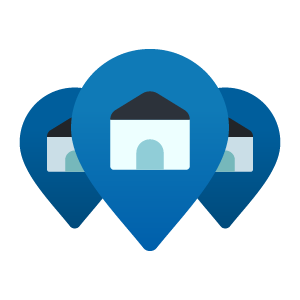

In [12]:
print(soup.prettify)

In [14]:
best_fren = pd.read_csv('data/소상공인시장진흥공단_우수프랜차이즈 현황_12_31_2019.csv', encoding='ms949')
best_fren

,구분,브랜드명
0,2019,"이차돌, 혼자라고굶지마라! 1인용, 크린토피아, 바른치킨, 반딧불이, 한앤둘치킨, ..."
1,2018,"이비가짬뽕, 핸즈커피, 월드크리닝, 메가엠지씨커피, 에듀플렉스, 월드크리닝, 이비가..."
2,2017,"맛깔참죽, 소담애, 시루향기, 요거프레소, 용우동, 이삭토스트, 핸즈커피, 이비가짬..."


In [39]:
best_list = best_fren.values.tolist()
best_list[0].remove(2019)
best_list[1].remove(2018)
best_list[2].remove(2017)
list1 = []
for i in range(3):
    list1.extend(best_list[i])
list1

['이차돌, 혼자라고굶지마라! 1인용, 크린토피아, 바른치킨, 반딧불이, 한앤둘치킨, 푸라닭, 크라운호프, 월드크리닝, 핸즈커피, 커피베이, 토프레소, 에듀플렉스, 깐깐한족발, 자담치킨, 메가MGC커피, 오레시피, 한마음정육식당, 수유리우동집, 강정구의 피자생각, 커브스, 아소비, 유가네닭갈비, 꼬지사께, 세븐스타코인노래연습장, 티바두마리치킨, 김형제고기의철학, 얌샘김밥, 33떡볶이',
 '이비가짬뽕, 핸즈커피, 월드크리닝, 메가엠지씨커피, 에듀플렉스, 월드크리닝, 이비가짬뽕, 커브스, 커피베이, 피자마루, 핸즈커피, 카페루앤비, 할매손충무김밥, 꼬지사께, 토프레소, 덤인, 곽두리쪽갈비, 깐깐한 족발, 꼬지사께, 세븐스타코인 노래연습장, 수유리우동집, 얌샘김밥, 참이맛감자탕, 카페루앤비, 토프레소, 할매손 충무김밥',
 '맛깔참죽, 소담애, 시루향기, 요거프레소, 용우동, 이삭토스트, 핸즈커피, 이비가짬뽕, 못된 고양이, 메가 커피, 에듀 플렉스, 이화수 전통육개장, 커피베이, 한촌설렁탕, 피자마루, 커브스, 꼬지사께, 더진국, 땅땅치킨, 엘리팝, 유가네 닭갈비, 이바돔 감자탕, 도이첸, 바보스, 카페앤루비, 월드클리닝, 개미인력개발, IGA 마트, 1인용, 깐깐한 족발, 수유리 우동집, 얌샘김밥, 세븐스타코인노래방, 곽두리쪽갈비, 참이맛 감자탕, 마루회덮밥, 안경매니저, 덤인']